## Madrid Property Analysis

#### 1) Data Cleaning
- In this step we will clean our data. This includes taking care of missing values, duplicates, etc. We already did the checks in the start, so we know we don't have duplicates. We only need to take care of the missing values. 

Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import openpyxl
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import StratifiedShuffleSplit


Import the CSV Data as Pandas DataFrame

In [30]:
df = pd.read_csv('../data/split/stratified_train_set.csv')
test_df = pd.read_csv('../data/split/stratified_test_set.csv')

We did this check to see the null values, and we can do it again just to refresh the data on the missing values. 

In [31]:
# Check for missing values in the dfFrame
print(df.isnull().sum())

inm_floor                                          3030
inm_size                                           1417
inm_price                                             0
inm_longitude                                         0
inm_latitude                                          0
inm_barrio                                         1431
inm_distrito                                       1384
his_price                                             0
his_quarterly_variation                               0
his_annual_variation                                  0
his_monthly_variation                                 0
dem_Indice_de_reemplazo_de_la_poblacion_activa        0
dem_Indice_de_juventud                                0
dem_Indice_de_estructura_de_la_poblacion_activa       0
dem_Indice_de_dependencia                             0
dem_TasaDeParo                                        0
dem_TamanoMedioDelHogar                               0
dem_PropSinEstudiosUniversitarios               

Due to it being a significant amount of data, removing the rows or dropping the columns due to their importance is not a wise choice, hence we will go ahead with deciding which imputation to do. 

- Mean / Median Imputation: For the numerical values, the mean/median imputation is one of the best techniques. Choosing which one from those will depend on how the data is skewed/ with outliers, (we will make plots to visalize that)

- For categorical values, we can fill with placeholders for now and then transform them to numerical values later on.

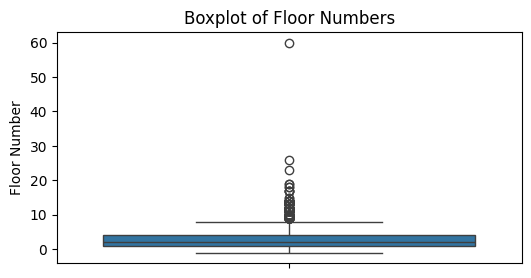

In [32]:
# Plotting the boxplot for the 'inm_floor' column
plt.figure(figsize=(6, 3))
sns.boxplot(y=df['inm_floor'])
plt.title('Boxplot of Floor Numbers')
plt.ylabel('Floor Number')
plt.show()

Given the presence of outliers, using the median to impute missing values would be a better choice because the median is not affected by these extreme values as much as the mean would be. We can do so with the following.

In [33]:
# For the training set
# Calculate the median of the 'inm_floor' column
floor_median = df['inm_floor'].median()
# Replace missing values with the median
df['inm_floor'].fillna(floor_median, inplace=True)

# For the test set
# Replace missing values with the median
test_df['inm_floor'].fillna(floor_median, inplace=True)

From our exploration, we know that size is also very important and as we have many missing values, we can also perform a check for that. Instead of checking for outliers now, we can check and see if the data is very skewed, indicating we would need to use median imputation.

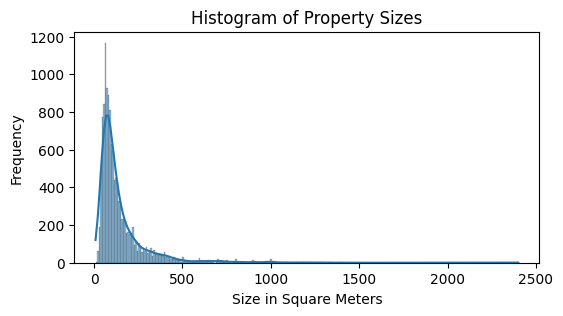

In [34]:
# Plotting the histogram for the 'inm_size' column
plt.figure(figsize=(6, 3))
sns.histplot(df['inm_size'], kde=True)
plt.title('Histogram of Property Sizes')
plt.xlabel('Size in Square Meters')
plt.ylabel('Frequency')
plt.show()

And as we can see, it appears to be very skewed, hence we will do median imputation.

In [35]:
# For the training set
# Calculate the median of the 'inm_size' column
size_median = df['inm_size'].median()
# Replace missing values with the median
df['inm_size'].fillna(size_median, inplace=True)

# For the test set
# Replace missing values with the median
test_df['inm_size'].fillna(size_median, inplace=True)

For inm_barrio and inm_distrito, as they are categorical values, we will use placeholder values of Unknown to fill them.

In [36]:
# For the training set
# Fill missing values with "Unknown"
df['inm_barrio'].fillna('Unknown', inplace=True)
df['inm_distrito'].fillna('Unknown', inplace=True)

# For the test set
# Fill missing values with "Unknown"
test_df['inm_barrio'].fillna('Unknown', inplace=True)
test_df['inm_distrito'].fillna('Unknown', inplace=True)

When dealing with demographic proportions or populations, again median imputation is typically a good solution as its robust to outliers and skewed distributions. However, we will first check with boxplots for the features dem_PropConEstudiosUniversitarios and dem_EdadMedia

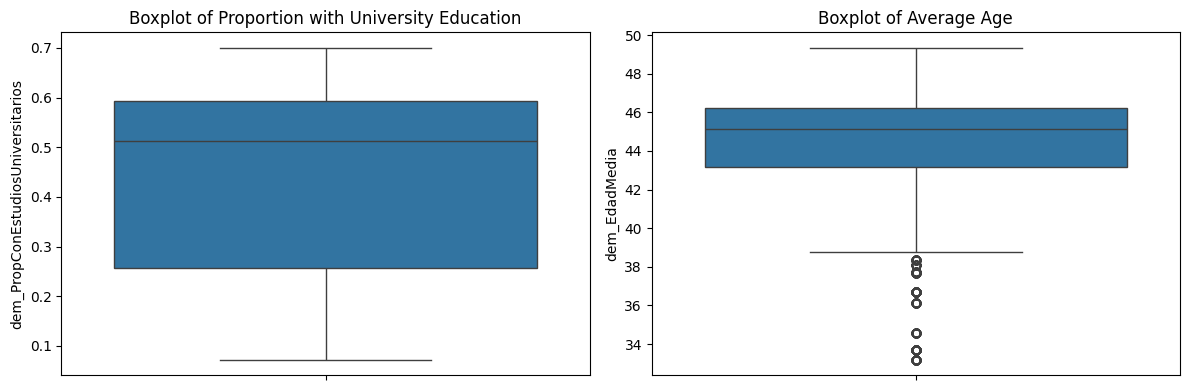

In [37]:
# Plotting boxplots for 'dem_PropConEstudiosUniversitarios' and 'dem_EdadMedia'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Boxplot for 'dem_PropConEstudiosUniversitarios'
sns.boxplot(y=df['dem_PropConEstudiosUniversitarios'], ax=axes[0])
axes[0].set_title('Boxplot of Proportion with University Education')

# Boxplot for 'dem_EdadMedia'
sns.boxplot(y=df['dem_EdadMedia'], ax=axes[1])
axes[1].set_title('Boxplot of Average Age')

plt.tight_layout()
plt.show()

Based on above results, the first one doesn't have outliers and doesn't seem very skewed, so will use mean for that, and median for the second one.

In [38]:
# For the training set
# Imputation for 'dem_PropConEstudiosUniversitarios' using the mean
prop_univ_mean = df['dem_PropConEstudiosUniversitarios'].mean()
df['dem_PropConEstudiosUniversitarios'].fillna(prop_univ_mean, inplace=True)
# Imputation for 'dem_EdadMedia' using the median
edad_media_median = df['dem_EdadMedia'].median()
df['dem_EdadMedia'].fillna(edad_media_median, inplace=True)

# For the test set
test_df['dem_PropConEstudiosUniversitarios'].fillna(prop_univ_mean, inplace=True)
test_df['dem_EdadMedia'].fillna(edad_media_median, inplace=True)

Lastly, we featured a new variable called the education_level_index which also has missing values. We will follow the same step to take care of that. 

In [14]:
# # Plotting the histogram for the 'inm_size' column
# plt.figure(figsize=(6, 3))
# sns.histplot(df['education_level_index'], kde=True)
# plt.title('Histogram of education_level_index')
# plt.xlabel('education_level_index')
# plt.ylabel('Frequency')
# plt.show()

Based on the histogram, it looks like the data is not normally distributed; it has a peak towards the higher end of the index values. This kind of distribution appears to be left-skewed, meaning there are a tail and a higher frequency of data points towards the higher end of the scale.

As we've been operating for these situations, we will prefer the median over the mean for imputation because the mean is influenced by the skewness and might not represent the central tendency of the data accurately. The median, being the middle value, will not be as affected by the skew and will provide a more robust measure for central tendency in this case.

In [15]:
# # For the training set
# # Calculate the median of the 'education_level_index' column
# education = df['education_level_index'].median()
# # Replace missing values with the median
# df['education_level_index'].fillna(education, inplace=True)

# # For the test set
# # Replace missing values with the median
# test_df['education_level_index'].fillna(education, inplace=True)

After completing all imputations and taking care of all missing values, we can do a final check to see that there are no missing values anymore

In [39]:
print(df.isna().sum())
print(test_df.isna().sum())

inm_floor                                          0
inm_size                                           0
inm_price                                          0
inm_longitude                                      0
inm_latitude                                       0
inm_barrio                                         0
inm_distrito                                       0
his_price                                          0
his_quarterly_variation                            0
his_annual_variation                               0
his_monthly_variation                              0
dem_Indice_de_reemplazo_de_la_poblacion_activa     0
dem_Indice_de_juventud                             0
dem_Indice_de_estructura_de_la_poblacion_activa    0
dem_Indice_de_dependencia                          0
dem_TasaDeParo                                     0
dem_TamanoMedioDelHogar                            0
dem_PropSinEstudiosUniversitarios                  0
dem_PropSinEstudios                           

As we can see, all the missing values have been taken care of, in the training and testing df. 

#### 2) Handling Categorical Variables
- We have seen before that we have 2 categorical variables that may be of relation with the target. However, since Machine Learning algorithms prefer to work with numbers, we will convert these categories from text to numbers.

In [40]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 27 numerical features : ['inm_floor', 'inm_size', 'inm_price', 'inm_longitude', 'inm_latitude', 'his_price', 'his_quarterly_variation', 'his_annual_variation', 'his_monthly_variation', 'dem_Indice_de_reemplazo_de_la_poblacion_activa', 'dem_Indice_de_juventud', 'dem_Indice_de_estructura_de_la_poblacion_activa', 'dem_Indice_de_dependencia', 'dem_TasaDeParo', 'dem_TamanoMedioDelHogar', 'dem_PropSinEstudiosUniversitarios', 'dem_PropSinEstudios', 'dem_Proporcion_de_nacidos_fuera_de_Espana', 'dem_PropConEstudiosUniversitarios', 'dem_PobTotal', 'dem_NumViviendas', 'dem_EdadMedia', 'dem_Densidad_(Habit/Ha)', 'annualized_return', 'socioeconomic_score', 'investment_score', 'investment_category']

We have 2 categorical features : ['inm_barrio', 'inm_distrito']


In [18]:
df.nunique()

inm_floor                                             23
inm_size                                             650
inm_price                                           2106
inm_longitude                                      12960
inm_latitude                                       13029
inm_barrio                                           122
inm_distrito                                          22
his_price                                            120
his_quarterly_variation                               70
his_annual_variation                                  89
his_monthly_variation                                 57
dem_Indice_de_reemplazo_de_la_poblacion_activa       121
dem_Indice_de_juventud                               121
dem_Indice_de_estructura_de_la_poblacion_activa      121
dem_Indice_de_dependencia                            121
dem_TasaDeParo                                       121
dem_TamanoMedioDelHogar                              121
dem_PropSinEstudiosUniversitari

From the outputs, our categorical variables have unique values as shown:

- inm_barrio                                           122
- inm_distrito                                          22

For distrcit, the variable with 22 unique values, they are nominal, so we will use one-hot encoding as the additional dimensions are not an issue for our dataset size.

For neighborhood, the variable with 122 unique values, using one-hot encoding would create many additional features, which could lead to high dimensionality and potentially cause issues like the curse of dimensionality or model overfitting. Hence we will use frequency encoding for it as it will keep the feature space manageable.


In [41]:
# One-hot encoding for the 'district' column
train_one_hot = pd.get_dummies(df['inm_distrito'], prefix='inm_distrito')
test_one_hot = pd.get_dummies(test_df['inm_distrito'], prefix='inm_distrito')

# Align the one-hot encoded columns of train and test to ensure they have the same columns
train_one_hot, test_one_hot = train_one_hot.align(test_one_hot, join='left', axis=1, fill_value=0)

# Concatenate the one-hot encoded columns back to the original dataframes
df = pd.concat([df, train_one_hot], axis=1)
test_df = pd.concat([test_df, test_one_hot], axis=1)

# Drop the original 'inm_distrito' column as it's now one-hot encoded
df.drop('inm_distrito', axis=1, inplace=True)
test_df.drop('inm_distrito', axis=1, inplace=True)

# List of one-hot encoded columns to convert to integers
one_hot_columns = [col for col in df.columns if 'inm_distrito_' in col]

# Convert each boolean column to an integer type column
for col in one_hot_columns:
    df[col] = df[col].astype(int)
    test_df[col] = test_df[col].astype(int)

# Frequency encoding for the 'inm_barrio' column
# Calculate frequencies
frequency = df['inm_barrio'].value_counts(normalize=True)

# Map frequencies to the train and test dataframes
df['inm_barrio_freq'] = df['inm_barrio'].map(frequency)
test_df['inm_barrio_freq'] = test_df['inm_barrio'].map(frequency).fillna(0)  # fill with 0 if not present in training

# Drop the original 'inm_barrio' column as it's now frequency encoded
df.drop('inm_barrio', axis=1, inplace=True)
test_df.drop('inm_barrio', axis=1, inplace=True)

# Now df and test_df have the 'inm_distrito' column one-hot encoded and 'inm_barrio' column frequency encoded

In [297]:
# # Frequency encoding for the 'inm_barrio' column
# # Calculate frequencies
# frequency = df['inm_barrio'].value_counts(normalize=True)

# # Map frequencies to the train and test dataframes
# df['inm_barrio_freq'] = df['inm_barrio'].map(frequency)
# test_df['inm_barrio_freq'] = test_df['inm_barrio'].map(frequency).fillna(0)  # fill with 0 if not present in training

# # Drop the original 'inm_barrio' column as it's now frequency encoded
# df.drop('inm_barrio', axis=1, inplace=True)
# test_df.drop('inm_barrio', axis=1, inplace=True)

# # Frequency encoding for the 'inm_barrio' column
# # Calculate frequencies
# frequency = df['inm_distrito'].value_counts(normalize=True)

# # Map frequencies to the train and test dataframes
# df['inm_distrito_freq'] = df['inm_distrito'].map(frequency)
# test_df['inm_distrito_freq'] = test_df['inm_distrito'].map(frequency).fillna(0)  # fill with 0 if not present in training

# # Drop the original 'inm_distrito' column as it's now frequency encoded
# df.drop('inm_distrito', axis=1, inplace=True)
# test_df.drop('inm_distrito', axis=1, inplace=True)




In [42]:
print(df.shape[1] == test_df.shape[1])

True


#### 3) Feature Scaling
- In this step we will scale our values as we have very different scales in the features. 

In [43]:
test_df.max().to_frame().T
# pd.DataFrame(df.max()).T

,inm_floor,inm_size,inm_price,inm_longitude,inm_latitude,his_price,his_quarterly_variation,his_annual_variation,his_monthly_variation,dem_Indice_de_reemplazo_de_la_poblacion_activa,...,inm_distrito_Retiro,inm_distrito_Salamanca,inm_distrito_San Blas - Canillejas,inm_distrito_Tetuán,inm_distrito_Unknown,inm_distrito_Usera,inm_distrito_Vicálvaro,inm_distrito_Villa de Vallecas,inm_distrito_Villaverde,inm_barrio_freq
0,17.0,2400.0,9100000.0,-3.547698,40.506627,8299.0,12.2,17.2,8.1,171.272727,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.100175


In [44]:
# Check for infinities in your DataFrame
print(test_df.isin([np.inf, -np.inf]).sum())


inm_floor                                           0
inm_size                                            0
inm_price                                           0
inm_longitude                                       0
inm_latitude                                        0
his_price                                           0
his_quarterly_variation                             0
his_annual_variation                                0
his_monthly_variation                               0
dem_Indice_de_reemplazo_de_la_poblacion_activa      0
dem_Indice_de_juventud                              0
dem_Indice_de_estructura_de_la_poblacion_activa     0
dem_Indice_de_dependencia                           0
dem_TasaDeParo                                      0
dem_TamanoMedioDelHogar                             0
dem_PropSinEstudiosUniversitarios                   0
dem_PropSinEstudios                                 0
dem_Proporcion_de_nacidos_fuera_de_Espana           0
dem_PropConEstudiosUniversit

In [45]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values
df.dropna(inplace=True)

test_df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values
test_df.dropna(inplace=True)

In [27]:
# from sklearn.preprocessing import MinMaxScaler

# # df and test_df are your training and testing data frames

# # Initialize the MinMaxScaler
# scaler = MinMaxScaler()

# # Fit the scaler on the training data
# scaler.fit(df)

# # Transform both train and test data
# df_scaled = scaler.transform(df)
# test_df_scaled = scaler.transform(test_df)

# # Convert the scaled arrays back to a DataFrame (if needed)
# df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
# test_df_scaled = pd.DataFrame(test_df_scaled, columns=test_df.columns)


In [46]:
from sklearn.preprocessing import MinMaxScaler

# Assume 'investment_category' is your target variable
# Make sure to replace 'investment_category' with the actual name of your target variable

# Select features only, excluding the target variable for scaling
features = df.drop('investment_category', axis=1)
test_features = test_df.drop('investment_category', axis=1)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data features only
scaler.fit(features)

# Transform the features of both train and test data
df_scaled_features = scaler.transform(features)
test_df_scaled_features = scaler.transform(test_features)

# Convert the scaled arrays back to a DataFrame and include the target variable
df_scaled = pd.DataFrame(df_scaled_features, columns=features.columns, index=df.index)
test_df_scaled = pd.DataFrame(test_df_scaled_features, columns=test_features.columns, index=test_df.index)

# Add the target variable back into the scaled DataFrames
df_scaled['investment_category'] = df['investment_category']
test_df_scaled['investment_category'] = test_df['investment_category']

In [47]:
df_scaled.to_csv('../data/processed/processed_train_set.csv', index=False)
test_df_scaled.to_csv('../data/processed/processed_test_set.csv', index=False)